# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load 
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
rural_ride_count = pyber_data_df[pyber_data_df["type"] == "Rural"].groupby(["type"]).count()["ride_id"]
suburban_ride_count = pyber_data_df[pyber_data_df["type"] == "Suburban"].groupby(["type"]).count()["ride_id"]
urban_ride_count = pyber_data_df[pyber_data_df["type"] == "Urban"].groupby(["type"]).count()["ride_id"]

print("rural_ride_count = \t",rural_ride_count[0])
print("suburban_ride_count = \t",suburban_ride_count[0])
print("urban_ride_count = \t",urban_ride_count[0])

rural_ride_count = 	 125
suburban_ride_count = 	 625
urban_ride_count = 	 1625


In [4]:
# 2. Get the total drivers for each city type
rural_driver_count = city_data_df[city_data_df["type"] == "Rural"].groupby(["type"]).sum()["driver_count"]
suburban_driver_count = city_data_df[city_data_df["type"] == "Suburban"].groupby(["type"]).sum()["driver_count"]
urban_driver_count = city_data_df[city_data_df["type"] == "Urban"].groupby(["type"]).sum()["driver_count"]

print("rural_driver_count = \t",rural_driver_count[0])
print("suburban_driver_count = ",suburban_driver_count[0])
print("urban_driver_count = \t",urban_driver_count[0])

rural_driver_count = 	 78
suburban_driver_count =  490
urban_driver_count = 	 2405


In [5]:
#  3. Get the total amount of fares for each city type
rural_fares = pyber_data_df[pyber_data_df["type"] == "Rural"].groupby(["type"]).sum()["fare"]
suburban_fares = pyber_data_df[pyber_data_df["type"] == "Suburban"].groupby(["type"]).sum()["fare"]
urban_fares = pyber_data_df[pyber_data_df["type"] == "Urban"].groupby(["type"]).sum()["fare"]

print("rural_fares = \t",rural_fares[0])
print("suburban_fares =",suburban_fares[0])
print("urban_fares = \t",urban_fares[0])

rural_fares = 	 4327.930000000002
suburban_fares = 19356.330000000013
urban_fares = 	 39854.380000000085


In [6]:
#  4. Get the average fare per ride for each city type. 
rural_avg_fare_per_ride = pyber_data_df[pyber_data_df["type"] == "Rural"].mean()["fare"]
suburban_avg_fare_per_ride = pyber_data_df[pyber_data_df["type"] == "Suburban"].mean()["fare"]
urban_avg_fare_per_ride = pyber_data_df[pyber_data_df["type"] == "Urban"].mean()["fare"]

print("rural_avg_fare_per_ride = \t",rural_avg_fare_per_ride)
print("suburban_avg_fare_per_ride = \t",suburban_avg_fare_per_ride)
print("urban_avg_fare_per_ride = \t",urban_avg_fare_per_ride)

rural_avg_fare_per_ride = 	 34.623440000000016
suburban_avg_fare_per_ride = 	 30.97012800000002
urban_avg_fare_per_ride = 	 24.52577230769236


In [7]:
# 5. Get the average fare per driver for each city type. 
rural_avg_fare_per_driver = rural_fares / rural_driver_count
suburban_avg_fare_per_driver = suburban_fares / suburban_driver_count
urban_avg_fare_per_driver = urban_fares / urban_driver_count

print("rural_avg_fare_per_driver = \t",rural_avg_fare_per_driver[0])
print("suburban_avg_fare_per_driver = \t",suburban_avg_fare_per_driver[0])
print("urban_avg_fare_per_driver = \t",urban_avg_fare_per_driver[0])

rural_avg_fare_per_driver = 	 55.48628205128208
suburban_avg_fare_per_driver = 	 39.50271428571431
urban_avg_fare_per_driver = 	 16.57146777546781


In [8]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame(index=["Rural", "Suburban", "Urban"])
pyber_summary_df["Total Rides"] = [rural_ride_count[0],suburban_ride_count[0],urban_ride_count[0]]
pyber_summary_df["Total Drivers"] = [rural_driver_count[0],suburban_driver_count[0],urban_driver_count[0]]
pyber_summary_df["Total Fares"] = [rural_fares[0],suburban_fares[0],urban_fares[0]]
pyber_summary_df["Average Fare per Ride"] = [rural_avg_fare_per_ride,suburban_avg_fare_per_ride,urban_avg_fare_per_ride]
pyber_summary_df["Average Fair per Driver"] = [rural_avg_fare_per_driver[0],suburban_avg_fare_per_driver[0],urban_avg_fare_per_driver[0]]
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fair per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fair per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [10]:
#  8. Format the columns.
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,.0f}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,.0f}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fair per Driver"] = pyber_summary_df["Average Fair per Driver"].map("${:,.2f}".format)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fair per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
# 1. Read the merged DataFrame

In [12]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
new_df=pyber_data_df.groupby(["date","type"]).sum()[["fare"]]

In [13]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
new_df=new_df.reset_index()

In [14]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
new_df=new_df.pivot(index="date",columns="type", values="fare")
new_df.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [65]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
filtered_df = new_df.loc['2019-01-01 00:00:00':'2019-04-29 23:59:59']

In [66]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
filtered_df.index = pd.to_datetime(filtered_df.index)

In [67]:
# 7. Check that the datatype for the index is datetime using df.info()
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2218 entries, 2019-01-01 00:08:16 to 2019-04-29 23:10:18
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     116 non-null    float64
 1   Suburban  579 non-null    float64
 2   Urban     1523 non-null   float64
dtypes: float64(3)
memory usage: 69.3 KB


In [68]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
weekly_df=filtered_df.resample('W', level=0).sum()
weekly_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


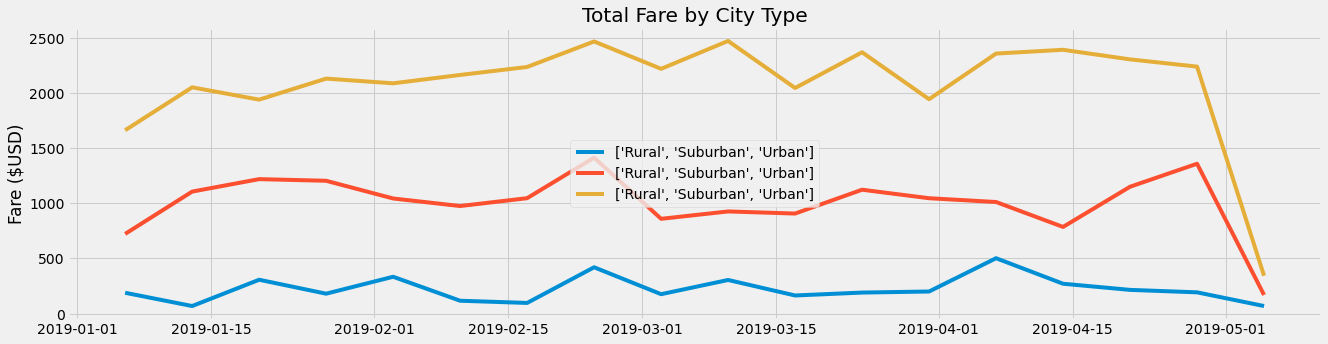

In [72]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

fig, ax=plt.subplots(figsize =(20,5))
ax.plot(weekly_df, label=['Rural','Suburban','Urban'])
ax.set_title("Total Fare by City Type")
ax.set_ylabel("Fare ($USD)")
#ax.set_xlim('2019-01-01','2019-04-29')
ax.legend()